# HW1 Machine Learning
## Single Variable Linear Regression

First we need to import some libraries such as pandas, numpy, matplotlib, statmodels. These are essential in next steps.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from matplotlib.pyplot import xlabel, ylabel
from sklearn.linear_model import LinearRegression

Then we read the data using pandas. we show a brief info of it. Pandas is a powerful library for working with data in python. 

In [4]:
csv_data = pd.read_csv('train.csv')
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

It is obvious that we have all of data in to our 'csv_data' variable. now we try to drop some useless cells. This part is mostly about feelings. So we drop the factors that would seem useless in buying a house. 

In [5]:
csv_data.drop(csv_data.columns[[1, 6, 7, 8, 10, 11, 17,
                                18, 21, 22, 23, 24, 29,
                                30, 31, 32, 33, 34, 35,
                                36, 37, 39, 47, 48, 56,
                                57, 58, 60, 61, 62, 63,
                                64, 65, 66, 67, 68, 69,
                                72, 73, 74, 75, 76]],
              axis=1, inplace=True)

csv_data.drop(csv_data.columns[[7, 8, 13, 14, 15, 16, 20, 33, 32]],
              axis=1, inplace=True)
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
Id               1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Utilities        1460 non-null object
Neighborhood     1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
TotalBsmtSF      1460 non-null int64
HeatingQC        1460 non-null object
CentralAir       1460 non-null object
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
KitchenQual      1460 non-null object
TotRmsAbvGrd     1460 non-null 

We have deleted nearly 50 columns. Next we know that most libraries (including scikit-learn) will give us an error if we try to build a model using data with missing values.
So we impute the null data values. The average would be same before and after this action.

In [6]:
print('Mean of LotFrontage befor Imputation:', csv_data['LotFrontage'].mean())

my_imputer = SimpleImputer()
csv_data['LotFrontage'] = my_imputer.fit_transform(
                            np.array(csv_data['LotFrontage']).reshape(-1,1))
print('Mean of LotFrontage:', csv_data['LotFrontage'].mean())
data_description = csv_data.describe()
print(data_description)

Mean of LotFrontage befor Imputation: 70.04995836802665
Mean of LotFrontage: 70.04995836802664
                Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    22.024023    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    60.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    70.049958    9478.500000  1973.000000   1994.000000   
75%    1095.250000    79.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1

A histogram plot may come with better undrestanding of data. so we plot histogram for all of our data values using 'hist' function.

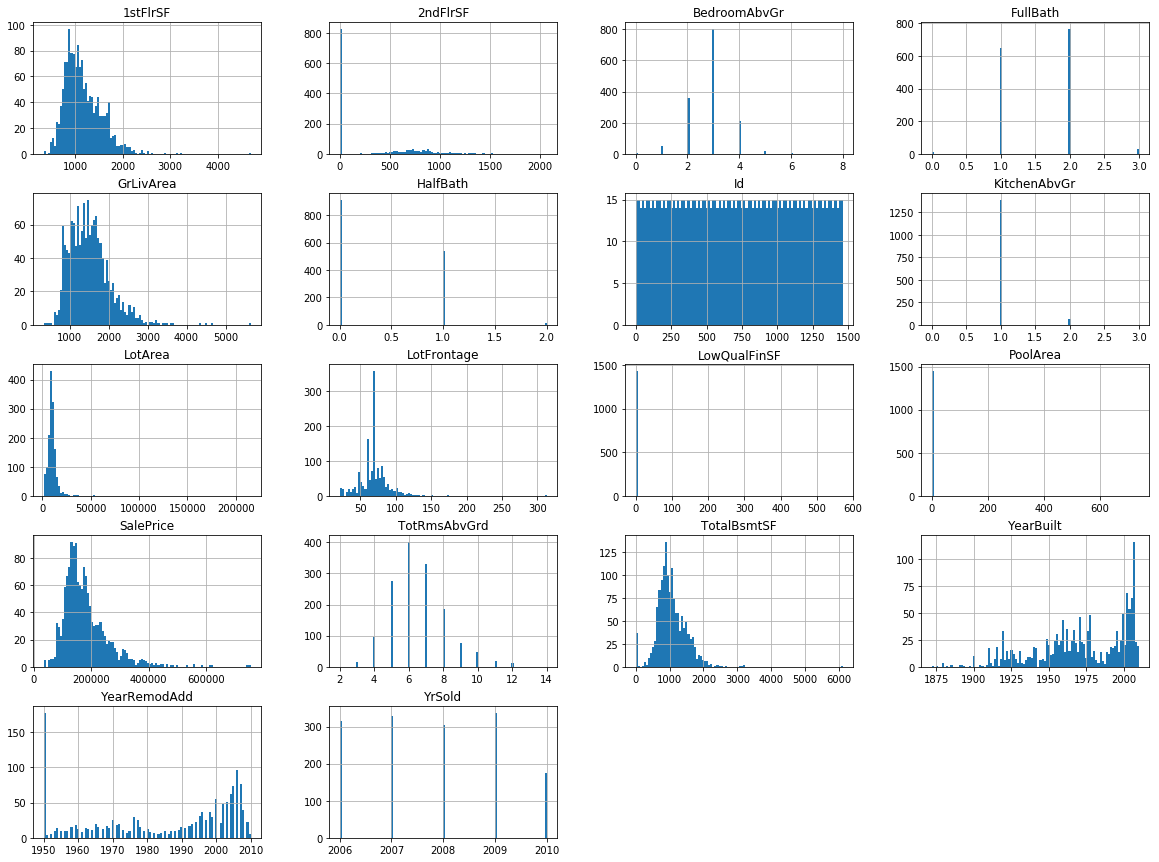

In [7]:
csv_data.hist(bins=100, figsize=(20,15))
plt.savefig("attribute histogram plots")
plt.show()

Next we compare some of our data with themselves and with SalePrice. These variables are picked with common sense about house prices: 'LotArea', 'YearBuilt', 'GrLivArea', 'YrSold'. We also need to add correlation plot for these variables so it may give us a better sense of how exactly these variables are related.

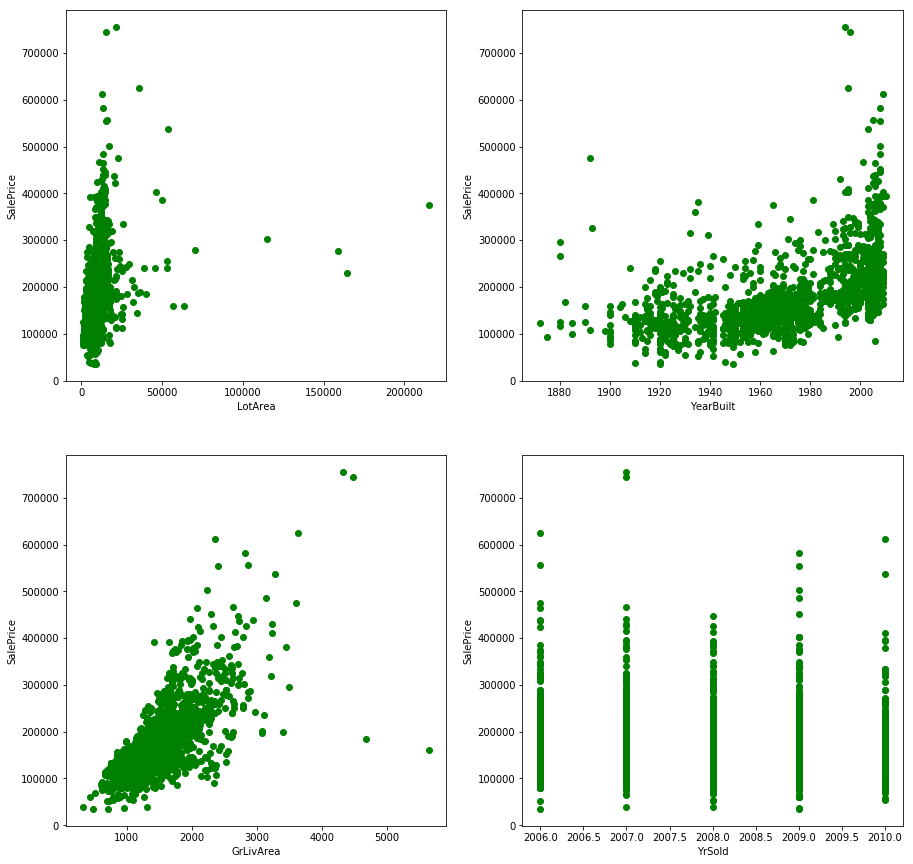

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, num='Plot of Some Features')
fig.set_figheight(15)
fig.set_figwidth(15)

plot_index = np.array(['LotArea', 'YearBuilt', 'GrLivArea', 'YrSold'])
i = 0;
for row in ax:
    for col in row:
        col.scatter(csv_data[plot_index[i]], csv_data['SalePrice'], color='g')
        col.set(xlabel=plot_index[i], ylabel='SalePrice')
        i = i + 1;

plt.savefig('some features')
plt.show()

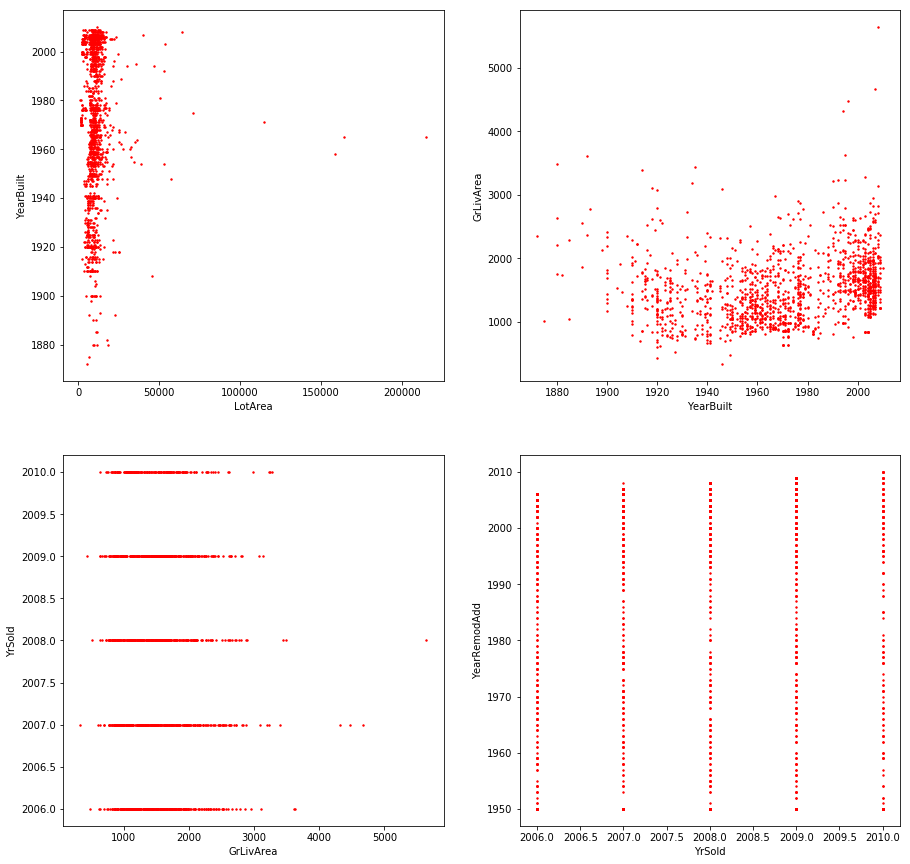

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, num='Plot of Some Features')
fig.set_figheight(15)
fig.set_figwidth(15)

plot_index = np.array(['LotArea', 'YearBuilt', 'GrLivArea', 'YrSold', 'YearRemodAdd'])
i = 0;
for row in ax:
    for col in row:
        col.scatter(csv_data[plot_index[i]], csv_data[plot_index[i + 1]], s=2, color='r')
        col.set(xlabel=plot_index[i], ylabel=plot_index[i + 1])
        i = i + 1;

plt.savefig('some features')
plt.show()

We shoud consider reviewing the correlation of variables. using few line of codes in pandas we know that what exactly is our correlation and how our variables are related together. 
As we observe, most of them hold for a week correlation. What is important is that 'SalePrice' has the strongest correlation with 'GrLivArea' so this variable may be the most important

In [10]:
csv_data.corr()


,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,PoolArea,YrSold,SalePrice
Id,1.000000,-0.009601,-0.033226,-0.012713,-0.021998,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.005587,0.006784,0.037719,0.002951,0.027239,0.057044,0.000712,-0.021917
LotFrontage,-0.009601,1.000000,0.306795,0.117598,0.082746,0.363358,0.414266,0.072483,0.036849,0.368392,0.180424,0.048258,0.237023,-0.005805,0.320146,0.180868,0.006768,0.334901
LotArea,-0.033226,0.306795,1.000000,0.014228,0.013788,0.260833,0.299475,0.050986,0.004779,0.263116,0.126031,0.014259,0.119690,-0.017784,0.190015,0.077672,-0.014261,0.263843
YearBuilt,-0.012713,0.117598,0.014228,1.000000,0.592855,0.391452,0.281986,0.010308,-0.183784,0.199010,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.004950,-0.013618,0.522897
YearRemodAdd,-0.021998,0.082746,0.013788,0.592855,1.000000,0.291066,0.240379,0.140024,-0.062419,0.287389,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.005829,0.035743,0.507101
TotalBsmtSF,-0.015415,0.363358,0.260833,0.391452,0.291066,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.126053,-0.014969,0.613581
1stFlrSF,0.010496,0.414266,0.299475,0.281986,0.240379,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.380637,-0.119916,0.127401,0.068101,0.409516,0.131525,-0.013604,0.605852
2ndFlrSF,0.005590,0.072483,0.050986,0.010308,0.140024,-0.174512,-0.202646,1.000000,0.063353,0.687501,0.421378,0.609707,0.502901,0.059306,0.616423,0.081487,-0.028700,0.319334
LowQualFinSF,-0.044230,0.036849,0.004779,-0.183784,-0.062419,-0.033245,-0.014241,0.063353,1.000000,0.134683,-0.000710,-0.027080,0.105607,0.007522,0.131185,0.062157,-0.028921,-0.025606
GrLivArea,0.008273,0.368392,0.263116,0.199010,0.287389,0.454868,0.566024,0.687501,0.134683,1.000000,0.630012,0.415772,0.521270,0.100063,0.825489,0.170205,-0.036526,0.708624


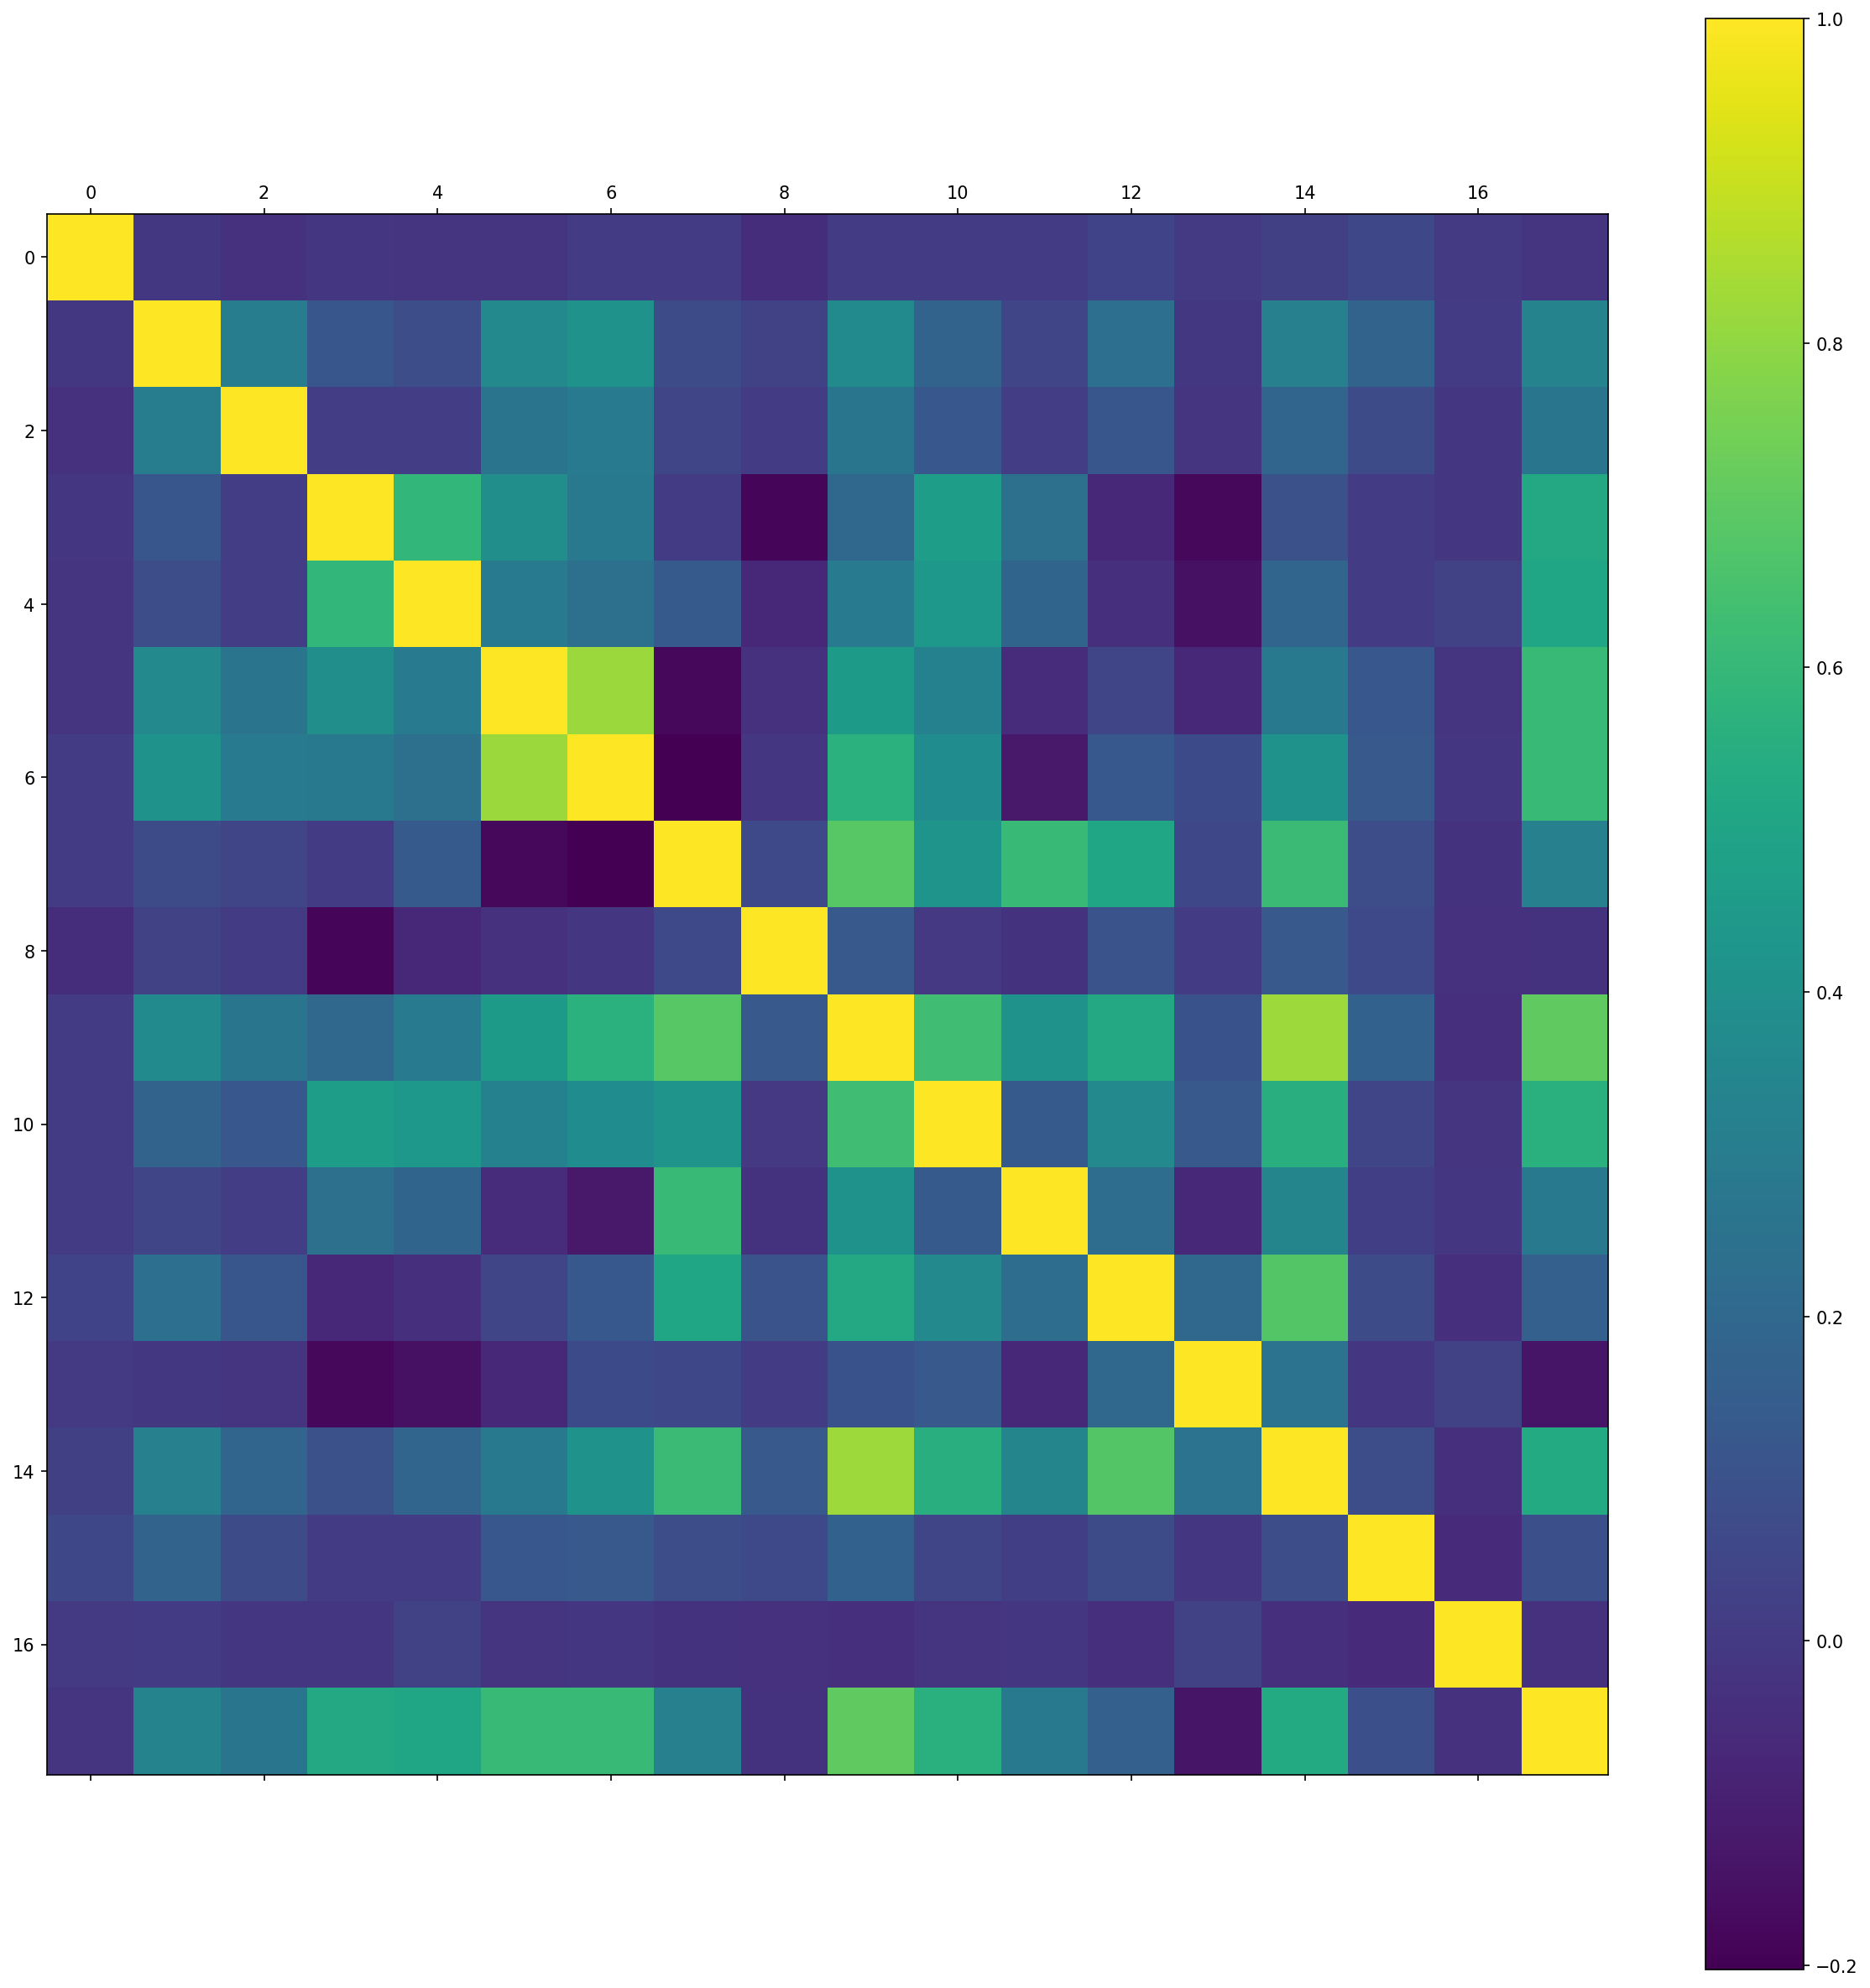

In [21]:
plt.figure(figsize=(20, 20), dpi=150)
plt.matshow(csv_data.corr(), fignum=1)
plt.colorbar()
plt.show()

One way of interpreting the coefficient of determination R^2 is to look at it as the Squared Pearson Correlation Coefficient between the observed values yi and the fitted values yi.

Now we need to plot a *Least Square Line* to model our data using linear regression. Then we extract its R-squared and P-value respectively. 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Fri, 15 Mar 2019   Prob (F-statistic):          4.52e-223
Time:                        01:39:55   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

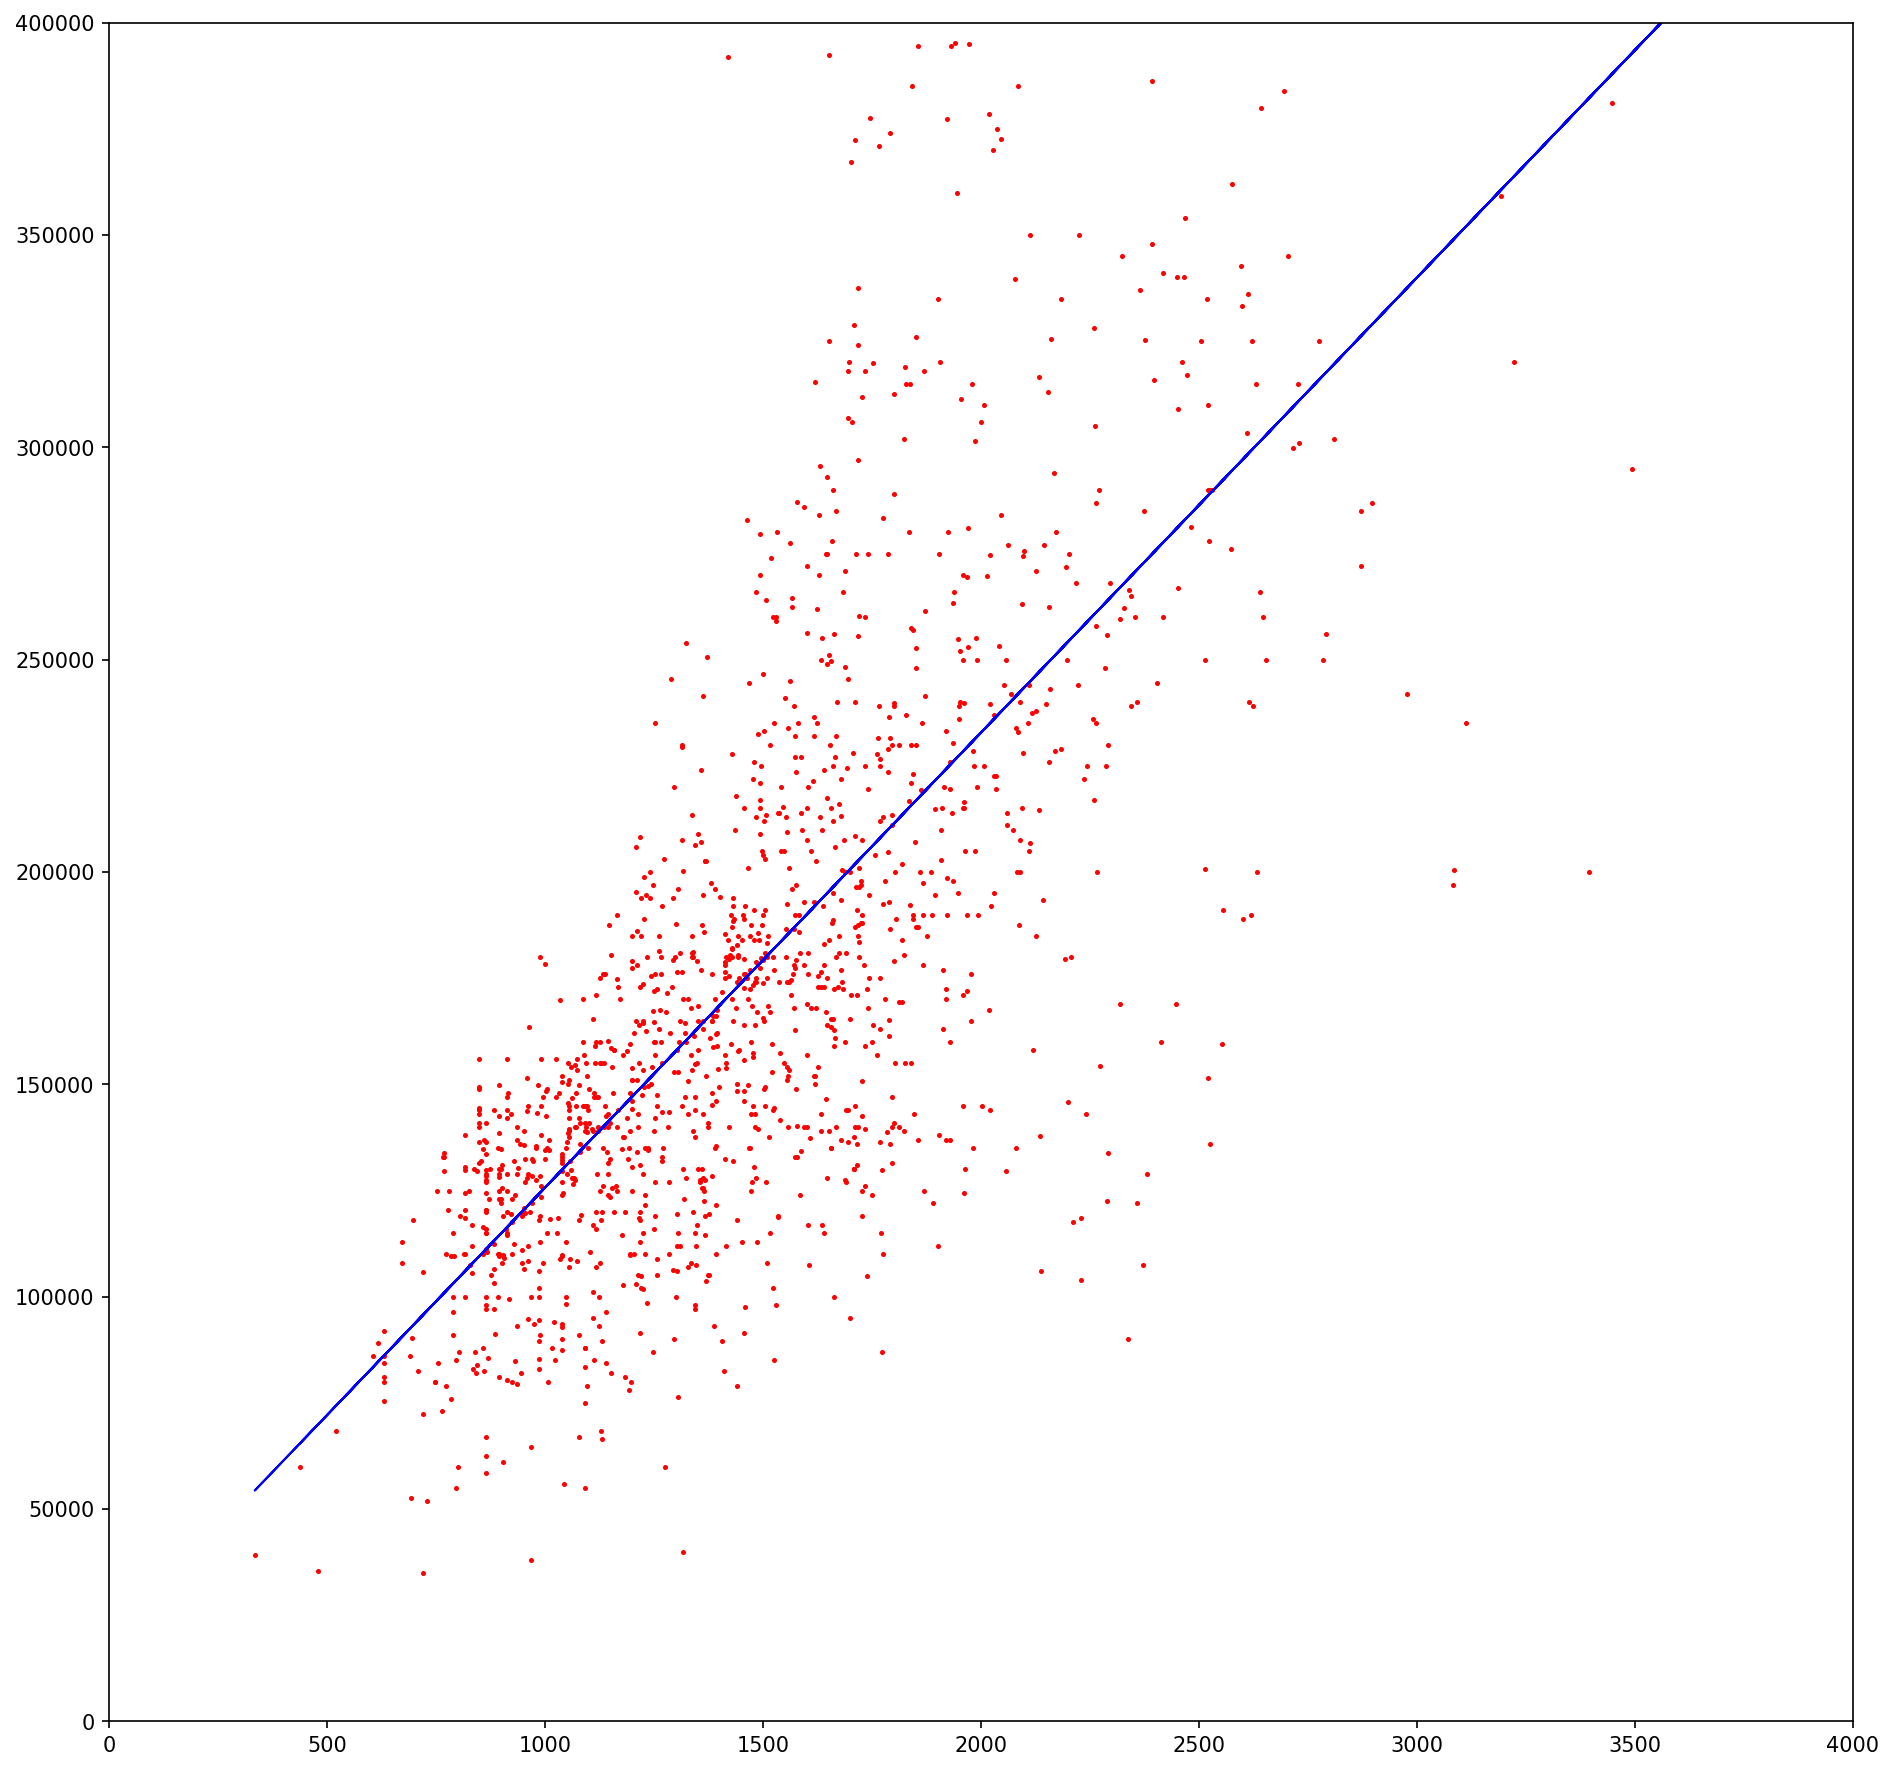

In [23]:
import warnings;
warnings.simplefilter('ignore')

# using linear regression
lm = LinearRegression()
lmodel = lm.fit(np.array(csv_data['GrLivArea']).reshape(-1,1), csv_data['SalePrice'])

# using statistic model for lot area
x = csv_data['GrLivArea']
y = csv_data['SalePrice']

x_n = sm.add_constant(x)

slm = sm.OLS(y, x_n).fit()
prediction_result = slm.predict(x_n)

print(slm.summary())

plt.figure(figsize=(15, 15), dpi=150, num='Price vs. GrLivArea Linear Regression')
plt.scatter(x, y, s=2, c='r')
plt.axis([0, 4000, 0, 400000])
 
plt.plot(x, prediction_result, c='b', label='LL Line', linewidth=1.0)
plt.show()

In [19]:
print('Desired Values:')
print('R-squared: ', slm.rsquared)
print('P-value: ', slm.pvalues)

Desired Values:
R-squared:  0.5021486502718042
P-value:  const         3.606554e-05
GrLivArea    4.518034e-223
dtype: float64


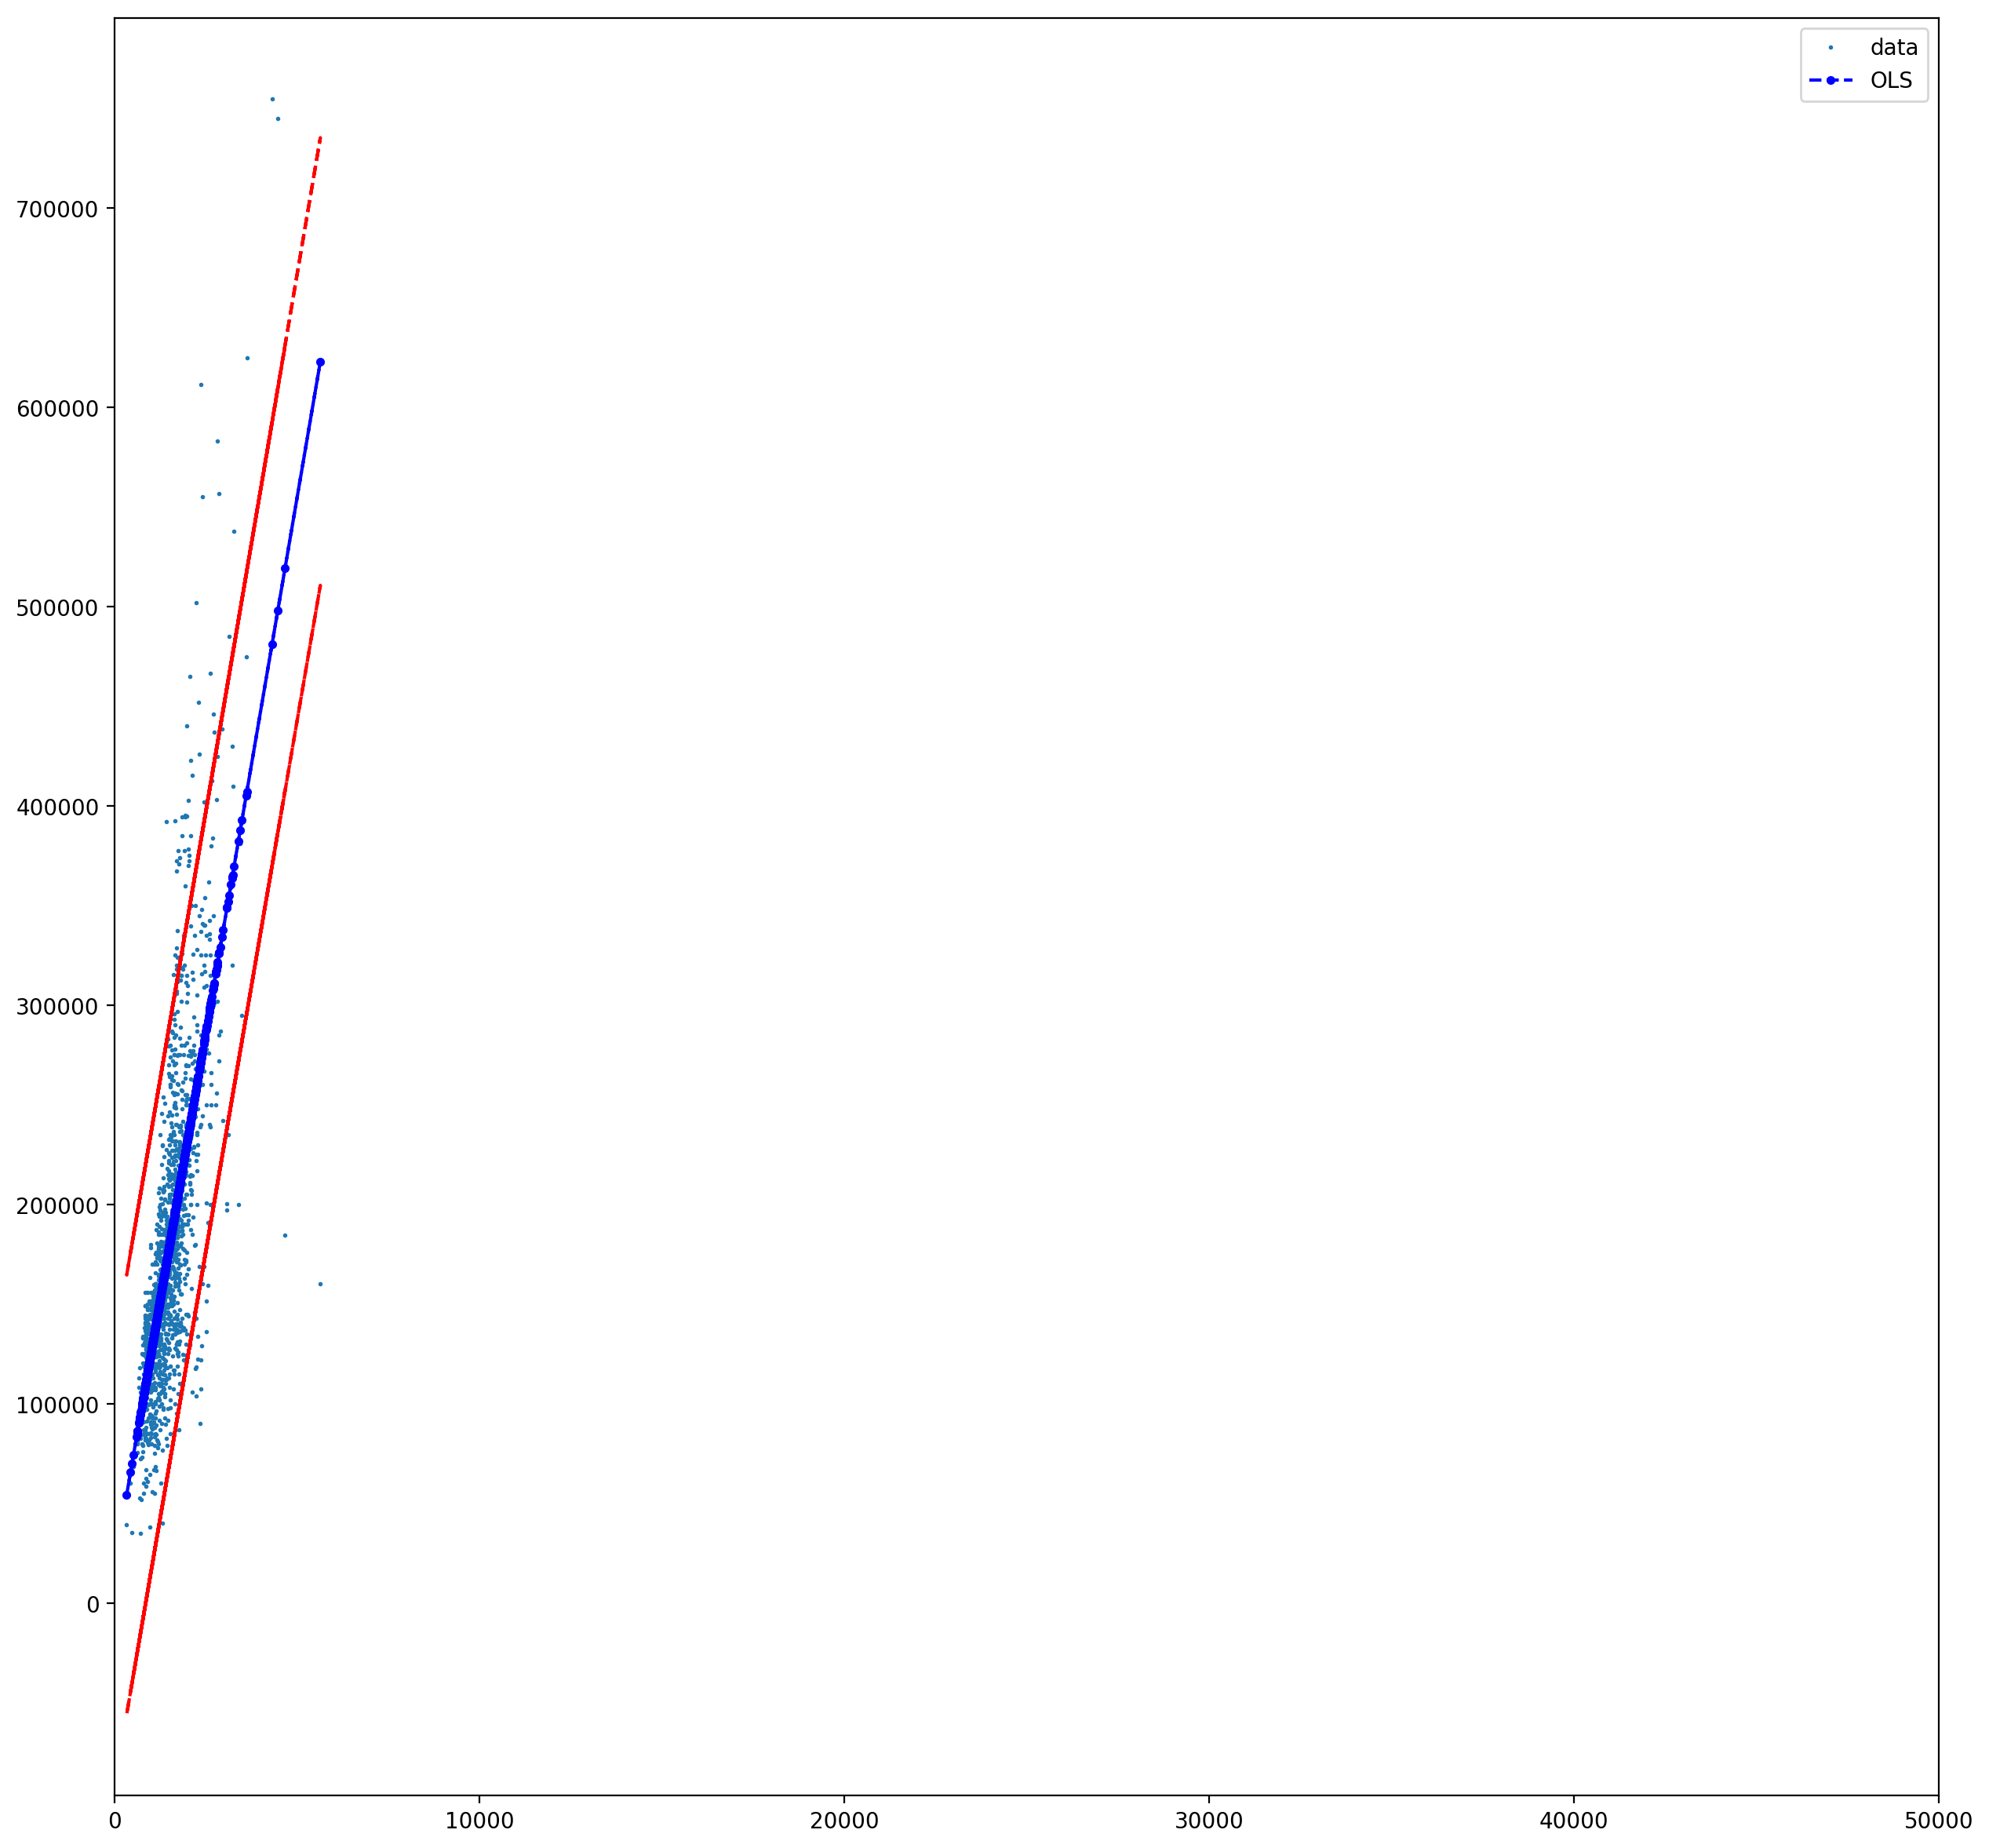

In [20]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(slm)

fig, ax = plt.subplots(dpi=200, num='Confidence Interval and STD')
fig.set_figheight(15)
fig.set_figwidth(15)
ax.plot(x, y, 'o', markersize=1, label="data")
ax.plot(x, slm.fittedvalues, 'b--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.set_xlim([0, 50000])
ax.legend(loc='best');

We do the same thing for variables in another way using seaborns.

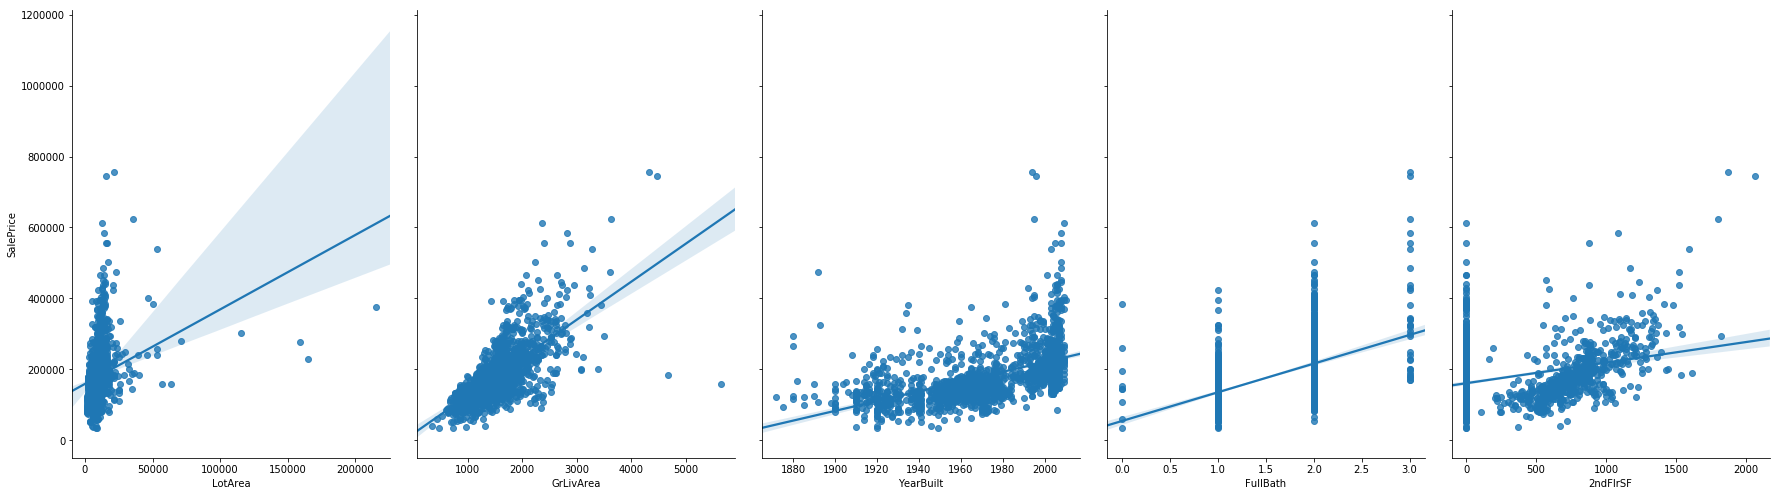

In [17]:
import seaborn as sns
sns.pairplot(csv_data, x_vars=['LotArea', 'GrLivArea', 'YearBuilt', 'FullBath', '2ndFlrSF'], y_vars='SalePrice', height=7, aspect=0.7, kind='reg')

This is the same last few steps for other variables. The difference between SST and SSE is the improvement in prediction from the regression model, compared to the mean model. Dividing that difference by SST gives R-squared. It is the proportional improvement in prediction from the regression model, compared to the mean model. It indicates the goodness of fit of the model. R-squared has the useful property that its scale is intuitive: it ranges from zero to one, with zero indicating that the proposed model does not improve prediction over the mean model, and one indicating perfect prediction. Improvement in the regression model results in proportional increases in R-squared. One pitfall of R-squared is that it can only increase as predictors are added to the regression model. This increase is artificial when predictors are not actually improving the model’s fit. To remedy this, a related statistic, Adjusted R-squared, incorporates the model’s degrees of freedom. Adjusted R-squared will decrease as predictors are added if the increase in model fit does not make up for the loss of degrees of freedom. Likewise, it will increase as predictors are added if the increase in model fit is worthwhile. Adjusted R-squared should always be used with models with more than one predictor variable. It is interpreted as the proportion of total variance that is explained by the model. There are situations in which a high R-squared is not necessary or relevant. When the interest is in the relationship between variables, not in prediction, the R-square is less important. An example is a study on how religiosity affects health outcomes. A good result is a reliable relationship between religiosity and health. No one would expect that religion explains a high percentage of the variation in health, as health is affected by many other factors. Even if the model accounts for other variables known to affect health, such as income and age, an R-squared in the range of 0.10 to 0.15 is reasonable.

## Multi-Variable Linear Regression

In this part we try to fit the regerssion line using 6 variables. Our candidates are 'LotArea', 'GrLivArea', 'LotFrontage', '2ndFlrSF', 'YearBuilt', 'FullBath'. These are elected using correlation with 'SalesPrice' variable.  Variables with higher correlation would probably be more suitable to use for regression problem. Following code will plot the regerssion line for each of these variables compared to 'SalePrice'.


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     528.2
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        00:42:35   Log-Likelihood:                -17699.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1453   BIC:                         3.545e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.966e+06   8.71e+04    -22.570      

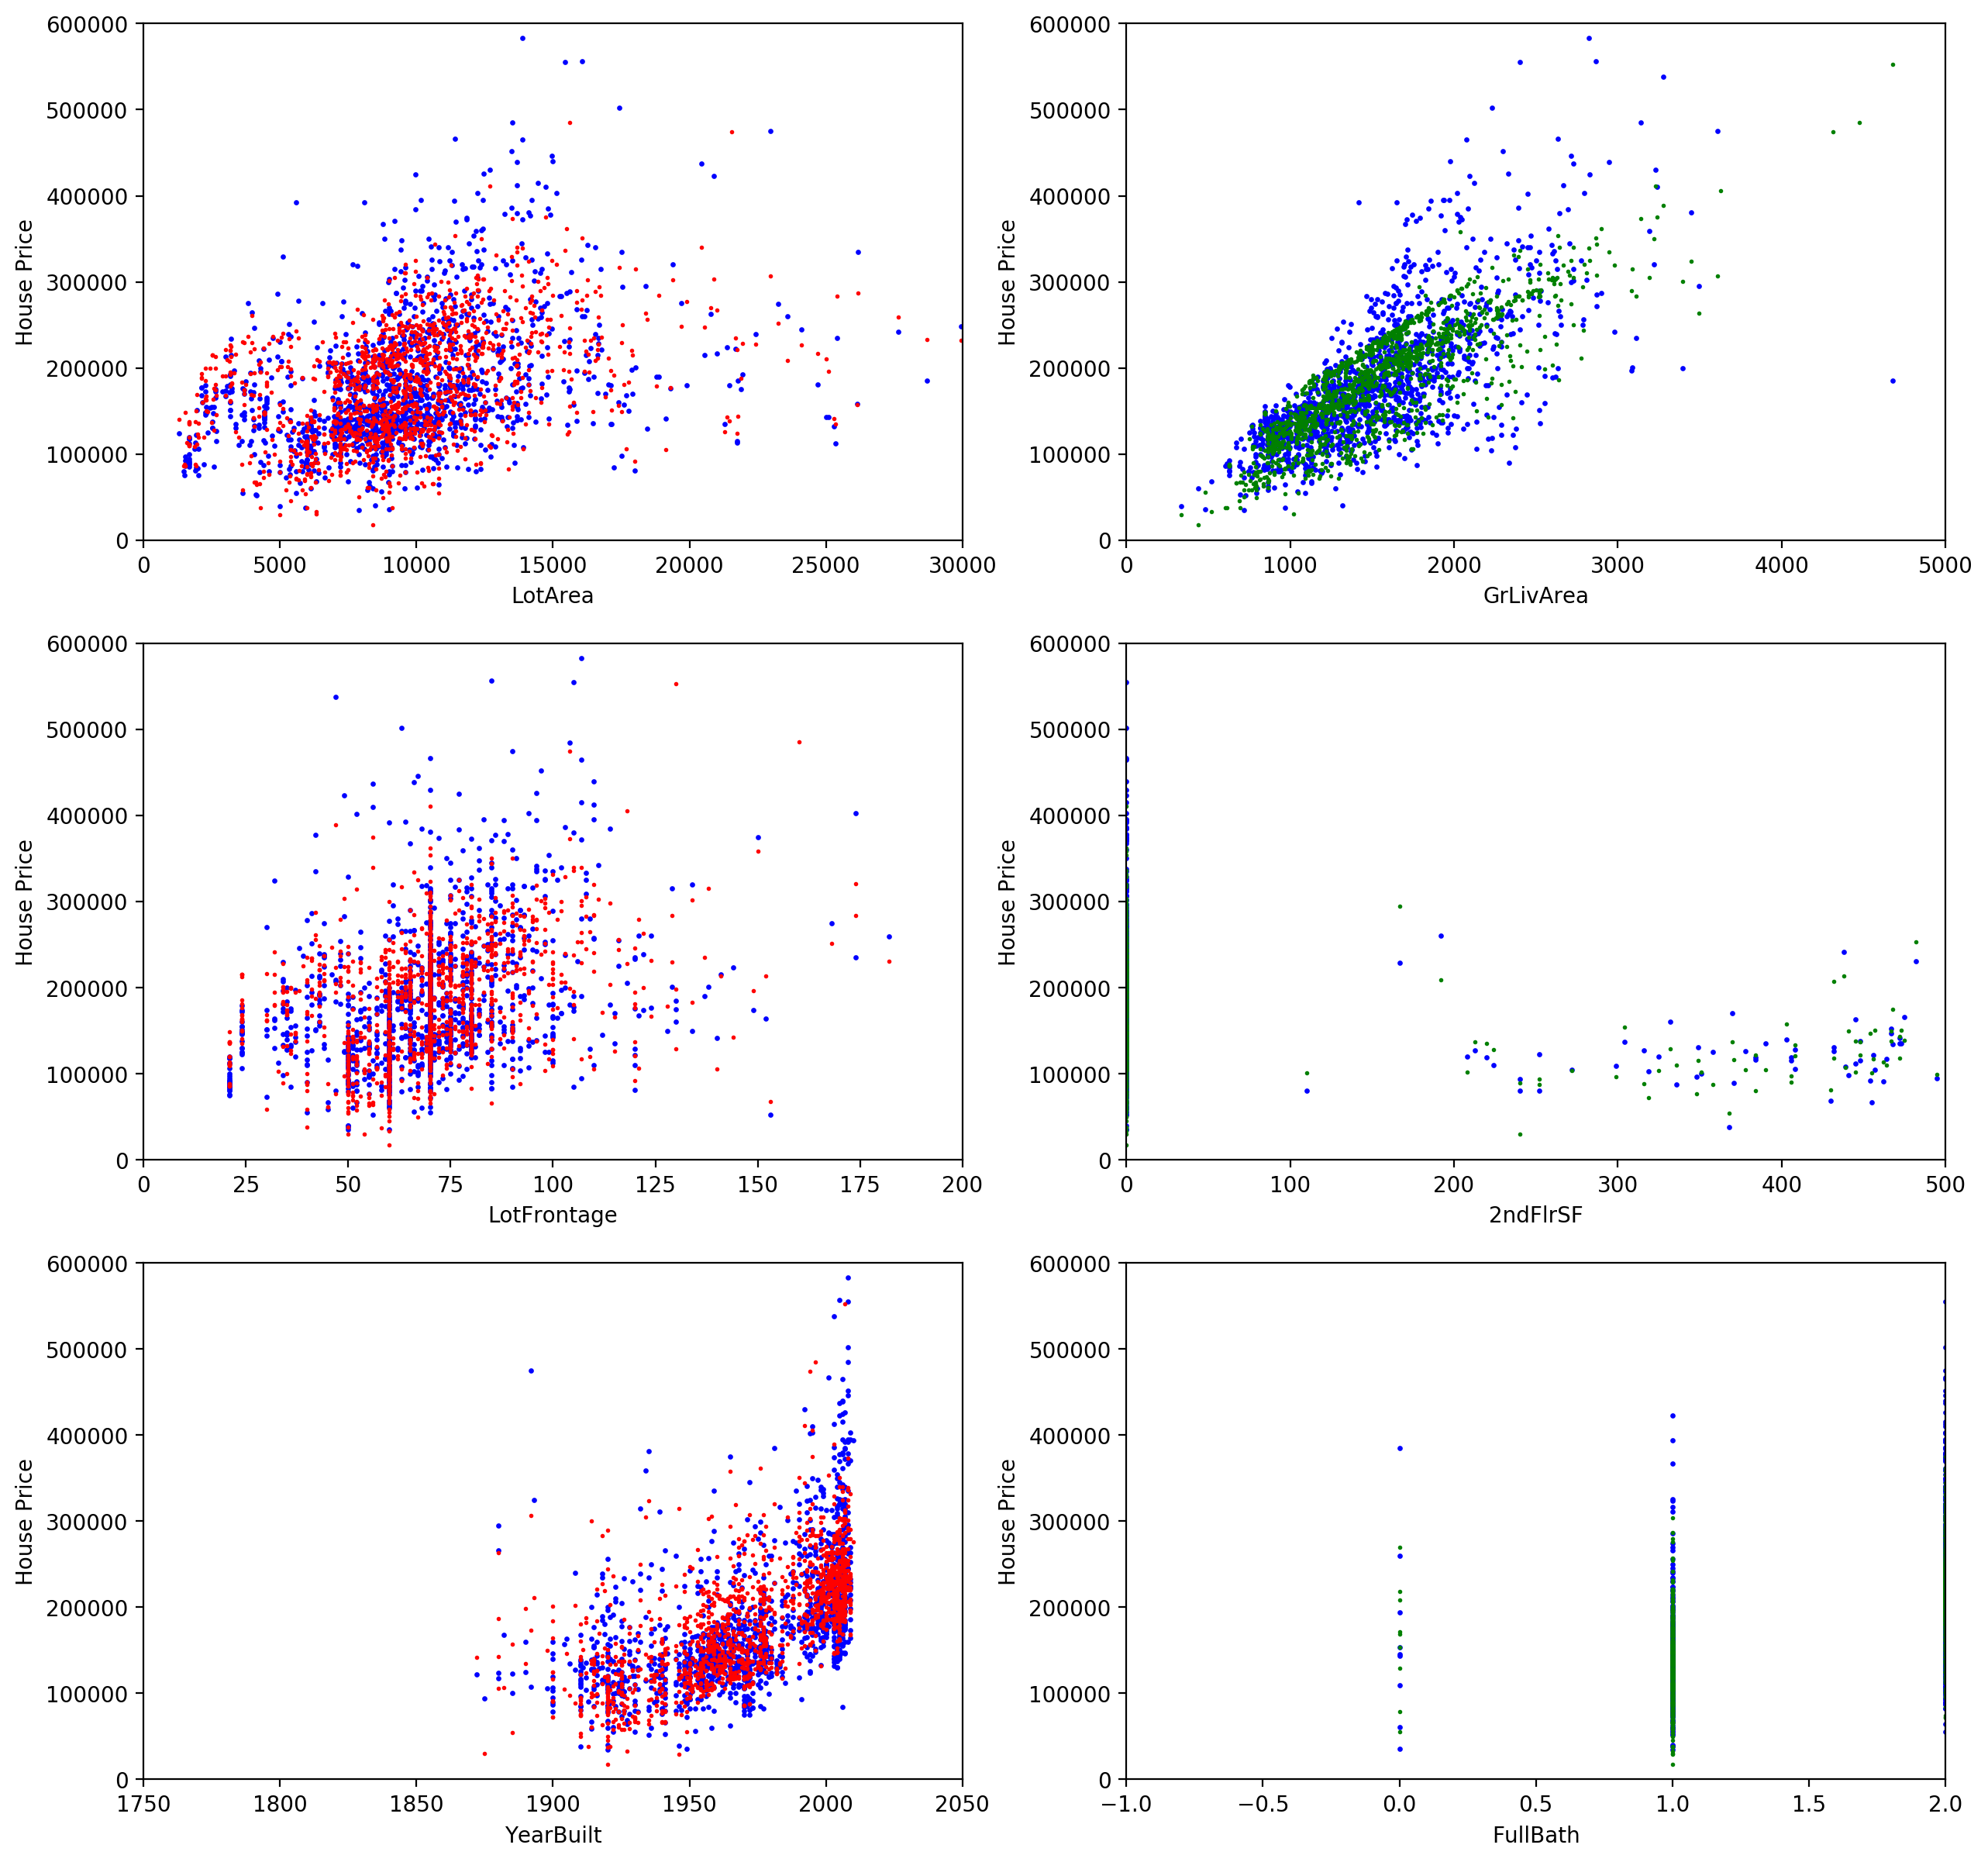

In [27]:
# using statistic model for variables
x_tot = csv_data[['LotArea', 'GrLivArea', 'LotFrontage', '2ndFlrSF', 'YearBuilt', 'FullBath']]
y = csv_data['SalePrice']

x_tot_n = sm.add_constant(x_tot)

slmm = sm.OLS(y, x_tot_n).fit()
prediction_result_m = slmm.predict(x_tot_n)

print(slmm.summary())

plt.figure(figsize=(15, 15), dpi=200, num='')

plt.subplot(3, 2, 1)
plt.scatter(x_tot['LotArea'], y, s=2, c='b')
plt.axis([0, 30000, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('LotArea')
plt.scatter(x_tot['LotArea'], prediction_result_m, s=1, c='r')

plt.subplot(3, 2, 2)
plt.scatter(x_tot['GrLivArea'], y, s=2, c='b')
plt.axis([0, 5000, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('GrLivArea')
plt.scatter(x_tot['GrLivArea'], prediction_result_m, s=1, c='g')

plt.subplot(3, 2, 3)
plt.scatter(x_tot['LotFrontage'], y, s=2, c='b')
plt.axis([0, 200, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('LotFrontage')
plt.scatter(x_tot['LotFrontage'], prediction_result_m, s=1, c='r')

plt.subplot(3, 2, 4)
plt.scatter(x_tot['2ndFlrSF'], y, s=2, c='b')
plt.axis([0, 500, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('2ndFlrSF')
plt.scatter(x_tot['2ndFlrSF'], prediction_result_m, s=1, c='g')

plt.subplot(3, 2, 5)
plt.scatter(x_tot['YearBuilt'], y, s=2, c='b')
plt.axis([1750, 2050, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('YearBuilt')
plt.scatter(x_tot['YearBuilt'], prediction_result_m, s=1, c='r')

plt.subplot(3, 2, 6)
plt.scatter(x_tot['FullBath'], y, s=2, c='b')
plt.axis([-1, 2, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('FullBath')
plt.scatter(x_tot['FullBath'], prediction_result_m, s=1, c='g')

plt.show()

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In the output above, we can see that the predictor variables of 'LotArea', 'GriLivArea', '2ndFlrSF' and 'YearBuilt'  are significant because all of their p-values are 0.000. However, the p-value for 'LotFrontage' and 'FullBath' are greater than the common alpha level of 0.05, which indicates that they are not statistically significant. 

Three statistics are used in Ordinary Least Squares (OLS) regression to evaluate model fit: R-squared, the overall F-test, and the Root Mean Square Error (RMSE). All three are based on two sums of squares: Sum of Squares Total (SST) and Sum of Squares Error (SSE). SST measures how far the data are from the mean, and SSE measures how far the data are from the model’s predicted values. Different combinations of these two values provide different information about how the regression model compares to the mean model.

So we decide to remove these two variables and repeat the last steps again.

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     792.0
Date:                Fri, 15 Mar 2019   Prob (F-statistic):               0.00
Time:                        09:12:28   Log-Likelihood:                -17700.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1455   BIC:                         3.544e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.917e+06   7.84e+04    -24.465      0.0

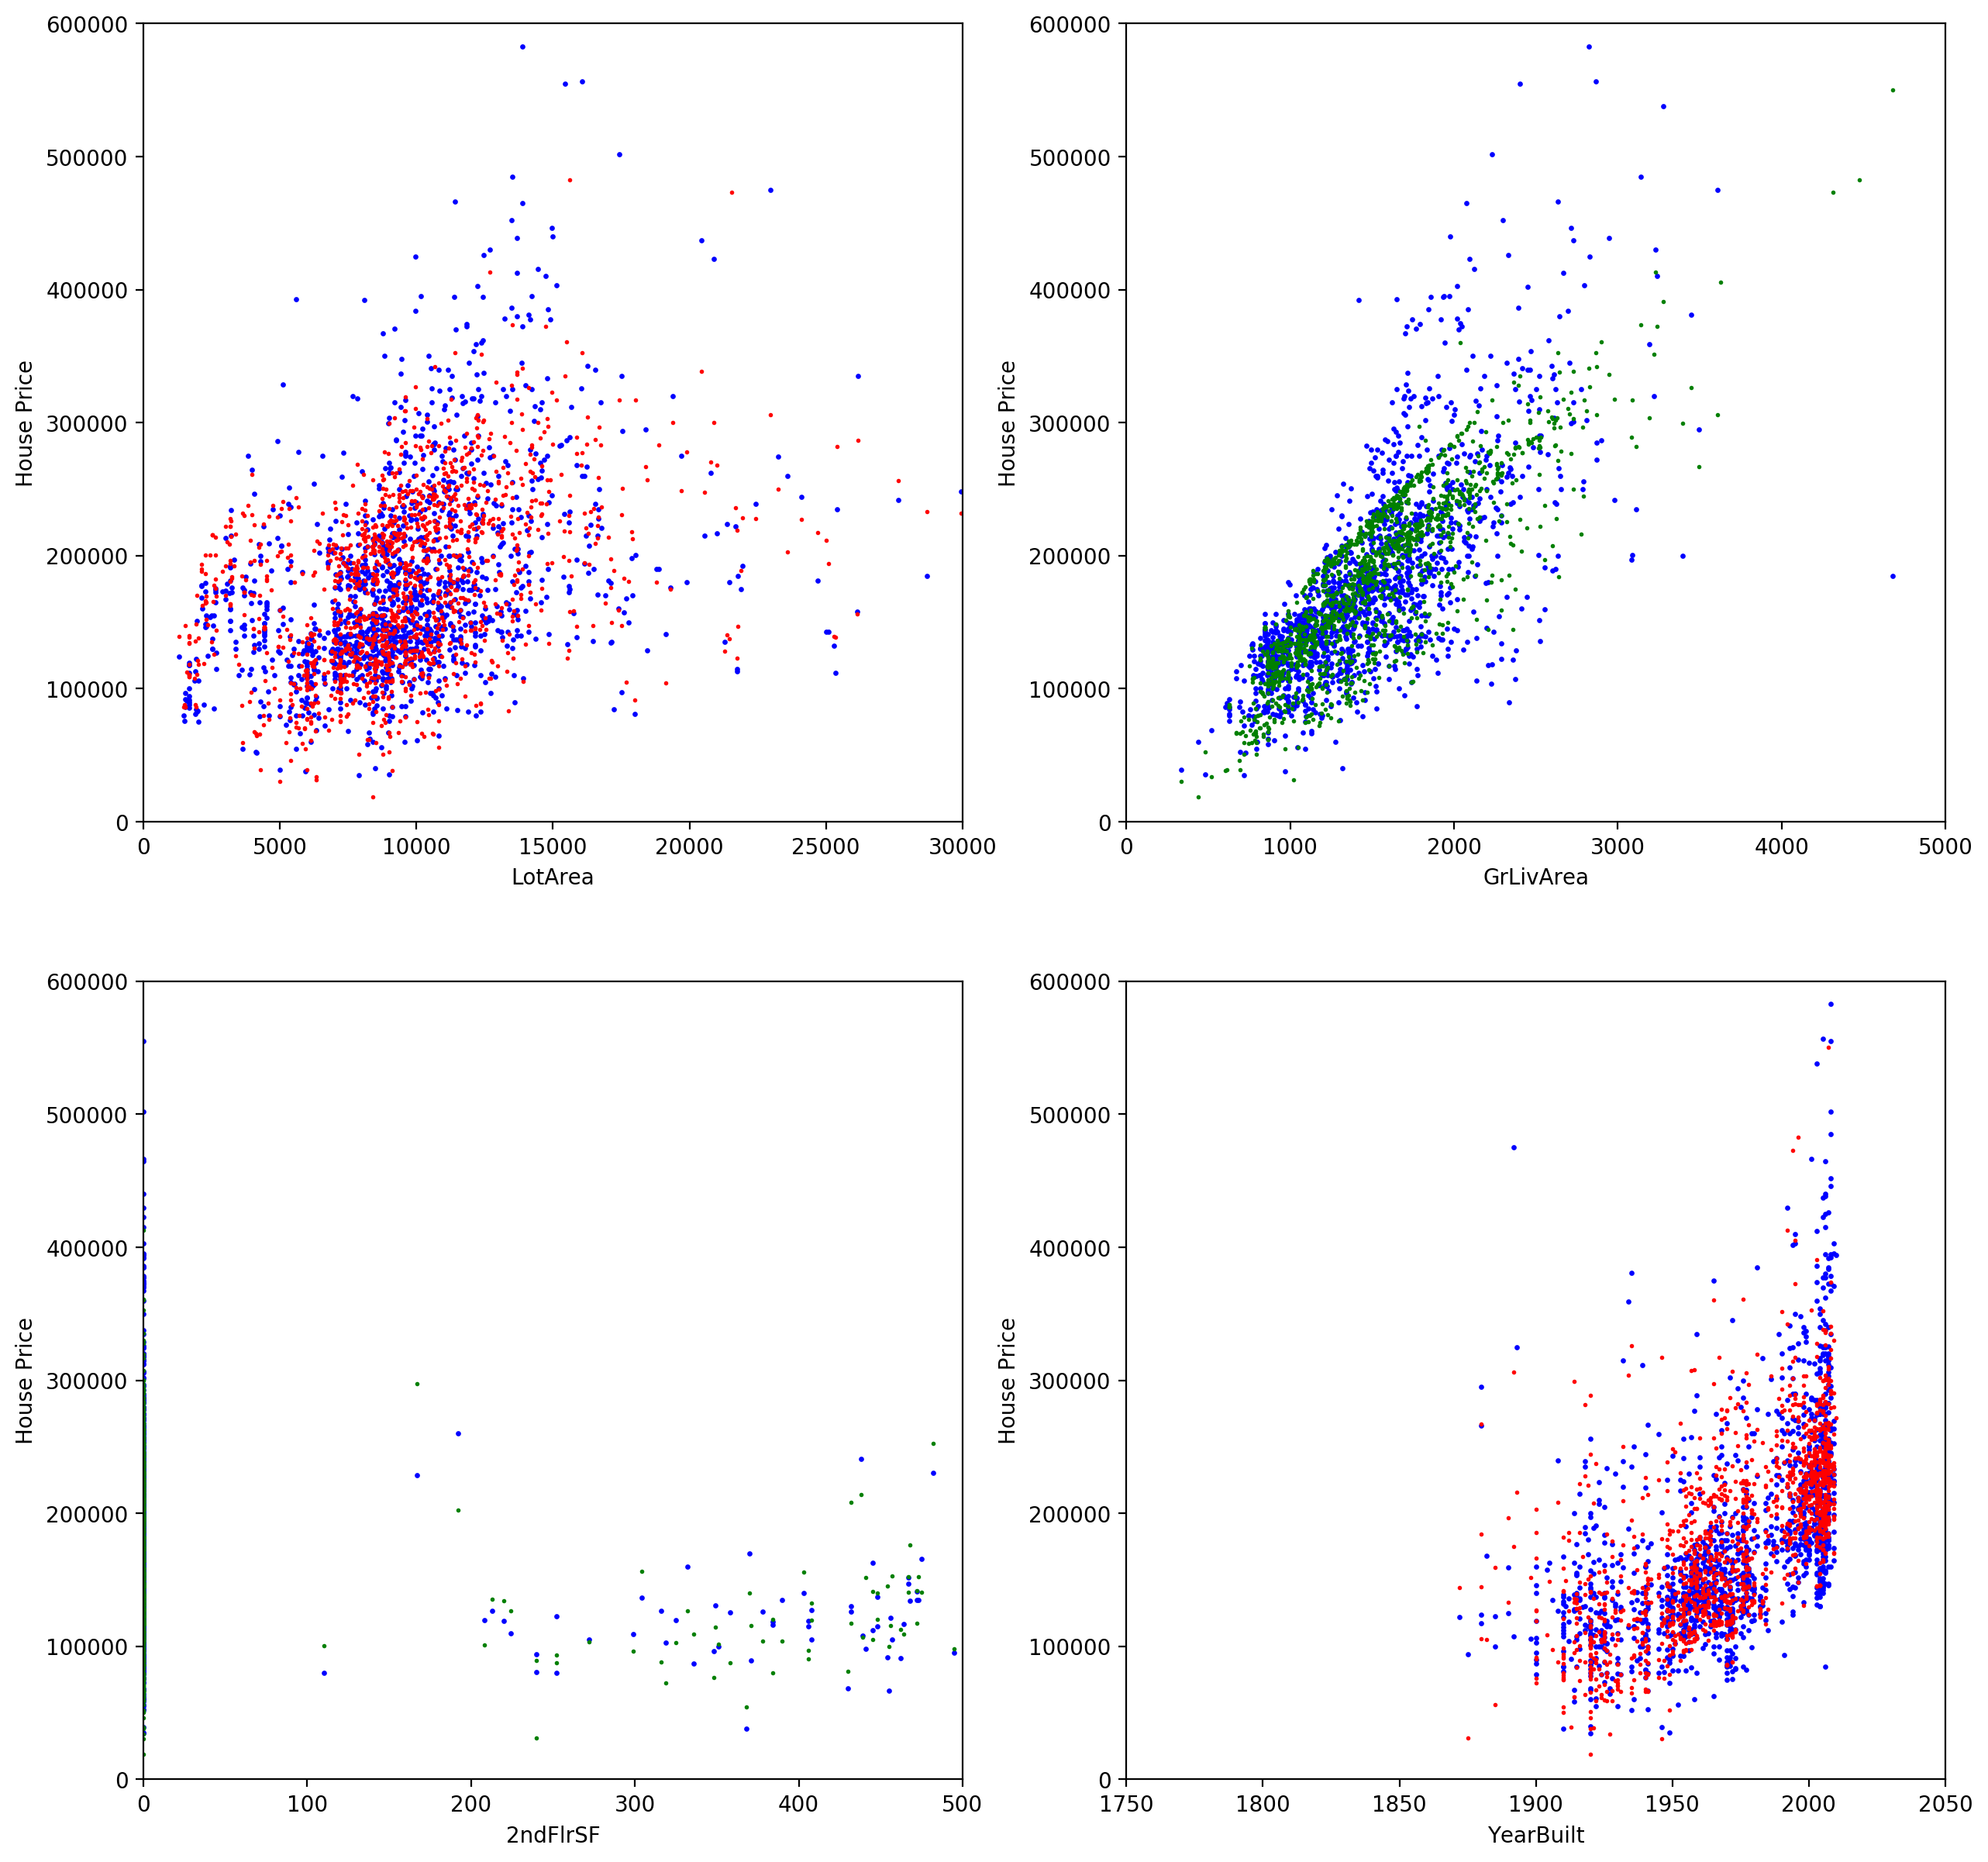

In [11]:
# using statistic model for variables
x_tot = csv_data[['LotArea', 'GrLivArea', '2ndFlrSF', 'YearBuilt']]
y = csv_data['SalePrice']

x_tot_n = sm.add_constant(x_tot)

slmm = sm.OLS(y, x_tot_n).fit()
prediction_result_m = slmm.predict(x_tot_n)

print(slmm.summary())

plt.figure(figsize=(15, 15), dpi=200, num='')

plt.subplot(2, 2, 1)
plt.scatter(x_tot['LotArea'], y, s=2, c='b')
plt.axis([0, 30000, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('LotArea')
plt.scatter(x_tot['LotArea'], prediction_result_m, s=1, c='r')

plt.subplot(2, 2, 2)
plt.scatter(x_tot['GrLivArea'], y, s=2, c='b')
plt.axis([0, 5000, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('GrLivArea')
plt.scatter(x_tot['GrLivArea'], prediction_result_m, s=1, c='g')

plt.subplot(2, 2, 3)
plt.scatter(x_tot['2ndFlrSF'], y, s=2, c='b')
plt.axis([0, 500, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('2ndFlrSF')
plt.scatter(x_tot['2ndFlrSF'], prediction_result_m, s=1, c='g')

plt.subplot(2, 2, 4)
plt.scatter(x_tot['YearBuilt'], y, s=2, c='b')
plt.axis([1750, 2050, 0, 600000])
plt.ylabel('House Price')
plt.xlabel('YearBuilt')
plt.scatter(x_tot['YearBuilt'], prediction_result_m, s=1, c='r')

plt.show()

Here is the results of most important variables. As it may be seen all p values are now too small. This is probably the best fit for house price data. we may exactly examine the p-values and r-squared:

In [12]:
print('Desired Values:')
print('R-squared: ', slmm.rsquared)
print('P-value: ', slmm.pvalues)

Desired Values:
R-squared:  0.6852773995562168
P-value:  const        5.332893e-111
LotArea       1.043461e-05
GrLivArea    6.600108e-190
2ndFlrSF      3.132678e-23
YearBuilt    3.848012e-110
dtype: float64


All of these values are implying that we finally reached an acceptable model to estimate data. A well-fitting regression model results in predicted values close to the observed data values. The mean model, which uses the mean for every predicted value, generally would be used if there were no informative predictor variables. The fit of a proposed regression model should therefore be better than the fit of the mean model.
